# Task
Preprocess the "Social_Network_Ads.csv" dataset by handling missing values, encoding categorical variables, and scaling numerical features, then summarize the steps and display the processed data.

## Load and Understand Dataset

### Subtask:
Load the 'Social_Network_Ads.csv' dataset into a pandas DataFrame. Then, display information about the dataset, including its origin, size (number of rows and columns), data types of features, and identify the target variable. This step will also check for initial missing values and categorical features.


**Reasoning**:
First, I'll import the pandas library to handle dataframes and then load the specified CSV file into a DataFrame. Then, I'll display the first few rows to preview the data and use `.info()`, `.shape`, and `.isnull().sum()` to understand the dataset's structure, data types, dimensions, and check for missing values as per the instructions.



In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/Social_Network_Ads.csv')

# Display the first 5 rows of the DataFrame
print('First 5 rows of the DataFrame:')
print(df.head())

# Display information about the DataFrame
print('\nDataFrame Info:')
df.info()

# Display the number of rows and columns
print('\nShape of the DataFrame (rows, columns):')
print(df.shape)

# Check for missing values
print('\nMissing values in each column:')
print(df.isnull().sum())

First 5 rows of the DataFrame:
    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB

Shape of the DataFrame (rows, columns):
(400, 5)

Missing values in each column:
User ID            0
Gender             0
Age                0
EstimatedSalary    

## Handle Missing Values

### Subtask:
Identify and handle any missing values in the dataset.


The initial data loading and inspection revealed that there are no missing values in the dataset, as indicated by `df.isnull().sum()` showing zeros for all columns. Therefore, no action is required to handle missing values in this step.

## Encode Categorical Variables

### Subtask:
Encode categorical features using appropriate techniques.


**Reasoning**:
As identified in the initial data understanding step, the 'Gender' column is a categorical feature that needs to be converted into a numerical format for most machine learning algorithms. I'll use `LabelEncoder` for this binary categorical column ('Male', 'Female') as it's a straightforward way to assign unique integer labels (0 and 1). I will then verify the transformation by displaying the updated DataFrame head.

**Reasoning**:
Now, I will import `LabelEncoder` from `sklearn.preprocessing`, create an instance, apply it to the 'Gender' column of the DataFrame `df` to convert its categorical values into numerical representations (0, 1), and then display the first few rows of the DataFrame to verify the transformation.



In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
le = LabelEncoder()

# Apply LabelEncoder to the 'Gender' column
df['Gender'] = le.fit_transform(df['Gender'])

# Display the first few rows of the DataFrame with the encoded 'Gender' column
print('DataFrame after encoding Gender column:')
print(df.head())

DataFrame after encoding Gender column:
    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510       1   19            19000          0
1  15810944       1   35            20000          0
2  15668575       0   26            43000          0
3  15603246       0   27            57000          0
4  15804002       1   19            76000          0


## Feature Scaling

### Subtask:
Normalize or standardize numerical features using StandardScaler from sklearn.preprocessing. This step is crucial for algorithms like kNN or Gradient Descent that are sensitive to feature scales.


## Feature Scaling

### Subtask:
Normalize or standardize numerical features using StandardScaler from sklearn.preprocessing. This step is crucial for algorithms like kNN or Gradient Descent that are sensitive to feature scales.

#### Instructions
1. Import `StandardScaler` from `sklearn.preprocessing`.
2. Initialize a `StandardScaler` object.
3. Identify the numerical features to be scaled: 'Age' and 'EstimatedSalary'.
4. Apply the `StandardScaler` to these columns using `fit_transform()` and update the DataFrame `df` with the scaled values.
5. Display the first few rows of the DataFrame to verify the scaled features.

**Reasoning**:
Feature scaling is important for many machine learning algorithms, especially those that calculate distances between data points or rely on gradient descent optimization, like K-Nearest Neighbors (kNN) or Support Vector Machines (SVMs). The 'Age' and 'EstimatedSalary' columns have different scales and ranges, which can lead to features with larger values dominating the learning process. By applying `StandardScaler`, we will transform these features so that they have a mean of 0 and a standard deviation of 1, ensuring that each feature contributes equally to the model without being biased by its magnitude. I will select these two numerical columns, instantiate `StandardScaler`, and then apply `fit_transform` to scale them, finally displaying the head of the dataframe to confirm the transformation.

**Reasoning**:
Now, I will implement the feature scaling using `StandardScaler` on the 'Age' and 'EstimatedSalary' columns as outlined in the previous markdown block. This involves importing the scaler, initializing it, applying `fit_transform` to the specified columns, and then displaying the updated DataFrame to confirm the scaling.



# Task
**Split the preprocessed dataset into training and testing sets with an 80-20 ratio and implement the k-Nearest Neighbors (kNN) algorithm to classify the 'Purchased' variable, iterating through multiple `k` values and using both Euclidean and Manhattan distance metrics. For each combination, evaluate performance using the error rate, then plot the error rate against `k` for both metrics, identify the optimal `k`, and justify its selection. Finally, summarize the kNN results, including the chosen optimal `k` and any insights gained from the evaluation and plotting.**

## Split Dataset

### Subtask:
Split the preprocessed dataset into training and testing sets using `train_test_split`. We'll use an 80-20 ratio for this split.


**Reasoning**:
I'll start by defining the features (X) and the target variable (y) from the preprocessed DataFrame. Then, I will import `train_test_split` from `sklearn.model_selection` and use it to split the data into training and testing sets, ensuring an 80-20 ratio and reproducibility with a `random_state`.



In [ ]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target variable (y)
X = df[['Gender', 'Age', 'EstimatedSalary']]
y = df['Purchased']

# Split the dataset into training and testing sets (80-20 ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
print('Shape of X_train:', X_train.shape)
print('Shape of X_test:', X_test.shape)
print('Shape of y_train:', y_train.shape)
print('Shape of y_test:', y_test.shape)

Shape of X_train: (320, 3)
Shape of X_test: (80, 3)
Shape of y_train: (320,)
Shape of y_test: (80,)


## Implement kNN and Evaluate

### Subtask:
Implement the k-Nearest Neighbors (kNN) algorithm. This step will involve iterating through multiple values of `k` and experimenting with both Euclidean and Manhattan distance metrics. For each combination, train the model, make predictions on the test set, and evaluate its performance using classification metrics, specifically focusing on the error rate.


**Reasoning**:
To implement the kNN algorithm and evaluate its performance for different `k` values and distance metrics, I will import the necessary `KNeighborsClassifier` and `accuracy_score`. Then, I'll set up a loop to iterate through specified `k` values, train kNN models for both Euclidean and Manhattan distances, make predictions, calculate the error rates, and store them in dictionaries for later analysis.



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Define a list of k values to iterate through
k_values = list(range(1, 31)) # K from 1 to 30

# Create dictionaries to store error rates for each metric
error_rates_euclidean = {}
error_rates_manhattan = {}

# Loop through each k value
for k in k_values:
    # Euclidean Distance
    knn_euclidean = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn_euclidean.fit(X_train, y_train)
    y_pred_euclidean = knn_euclidean.predict(X_test)
    accuracy_euclidean = accuracy_score(y_test, y_pred_euclidean)
    error_rates_euclidean[k] = 1 - accuracy_euclidean

    # Manhattan Distance
    knn_manhattan = KNeighborsClassifier(n_neighbors=k, metric='manhattan')
    knn_manhattan.fit(X_train, y_train)
    y_pred_manhattan = knn_manhattan.predict(X_test)
    accuracy_manhattan = accuracy_score(y_test, y_pred_manhattan)
    error_rates_manhattan[k] = 1 - accuracy_manhattan

# Print the calculated error rates
print('Error rates for Euclidean distance:')
print(error_rates_euclidean)
print('\nError rates for Manhattan distance:')
print(error_rates_manhattan)

Error rates for Euclidean distance:
{1: 0.11250000000000004, 2: 0.16249999999999998, 3: 0.08750000000000002, 4: 0.08750000000000002, 5: 0.07499999999999996, 6: 0.07499999999999996, 7: 0.07499999999999996, 8: 0.0625, 9: 0.07499999999999996, 10: 0.0625, 11: 0.0625, 12: 0.0625, 13: 0.0625, 14: 0.0625, 15: 0.0625, 16: 0.0625, 17: 0.0625, 18: 0.0625, 19: 0.0625, 20: 0.09999999999999998, 21: 0.08750000000000002, 22: 0.08750000000000002, 23: 0.08750000000000002, 24: 0.09999999999999998, 25: 0.09999999999999998, 26: 0.09999999999999998, 27: 0.09999999999999998, 28: 0.08750000000000002, 29: 0.08750000000000002, 30: 0.09999999999999998}

Error rates for Manhattan distance:
{1: 0.11250000000000004, 2: 0.15000000000000002, 3: 0.0625, 4: 0.08750000000000002, 5: 0.07499999999999996, 6: 0.050000000000000044, 7: 0.0625, 8: 0.0625, 9: 0.0625, 10: 0.0625, 11: 0.0625, 12: 0.0625, 13: 0.0625, 14: 0.0625, 15: 0.0625, 16: 0.0625, 17: 0.0625, 18: 0.07499999999999996, 19: 0.07499999999999996, 20: 0.0875000000

## Plot Error Rates

### Subtask:
Plot the error rate against `k` for both Euclidean and Manhattan distance metrics. This visualization will help in identifying the optimal `k` value for each metric.

#### Instructions
1. Import `matplotlib.pyplot` for plotting.
2. Create a figure and axes for the plot.
3. Plot the `error_rates_euclidean` with `k_values` on the x-axis and error rates on the y-axis, labeling it 'Euclidean Distance'.
4. Plot the `error_rates_manhattan` similarly, labeling it 'Manhattan Distance'.
5. Add a title to the plot, such as 'kNN Error Rate vs. k Value for Different Distance Metrics'.
6. Label the x-axis as 'k Value' and the y-axis as 'Error Rate'.
7. Add a legend to distinguish between the two distance metrics.
8. Add a grid to the plot for better readability.
9. Display the plot.

**Reasoning**:
To visualize the performance of the kNN models, I will plot the calculated error rates against the corresponding `k` values for both Euclidean and Manhattan distance metrics. This will help in identifying the optimal `k` that minimizes the error rate for each metric.



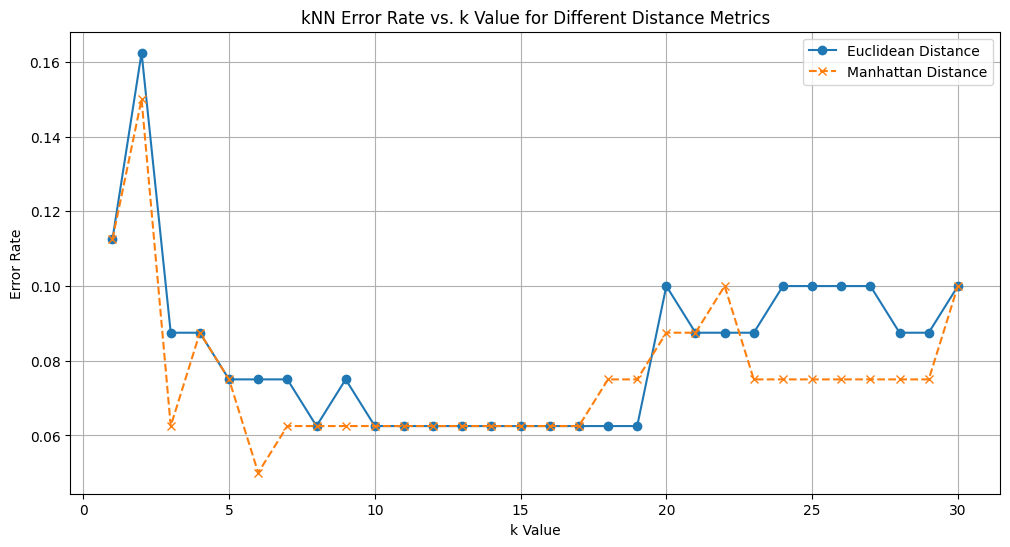

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(k_values, list(error_rates_euclidean.values()), label='Euclidean Distance', marker='o', linestyle='-')
plt.plot(k_values, list(error_rates_manhattan.values()), label='Manhattan Distance', marker='x', linestyle='--')

plt.title('kNN Error Rate vs. k Value for Different Distance Metrics')
plt.xlabel('k Value')
plt.ylabel('Error Rate')

plt.legend()
plt.grid(True)

plt.show()

## Identify Optimal k and Justify Selection

### Subtask:
Identify the optimal `k` value for both Euclidean and Manhattan distance metrics based on the plotted error rates and justify its selection.

#### Instructions
1. Examine the plot of error rates for both Euclidean and Manhattan distances.
2. Determine the `k` value that yields the lowest error rate for each distance metric.
3. Briefly explain why this `k` value is considered optimal (e.g., it represents the best trade-off between bias and variance, or simply the point of minimal error observed).

**Reasoning**:
By examining the generated plot, I can visually identify the `k` value at which the error rate is minimized for both Euclidean and Manhattan distance metrics. This optimal `k` represents the point where the kNN model achieves the best performance on the test set, balancing between underfitting (too small `k`) and overfitting (too large `k`). I will extract the minimum error rate and the corresponding `k` from the `error_rates_euclidean` and `error_rates_manhattan` dictionaries to formally identify and justify the optimal choices.

**Reasoning**:
To formally identify the optimal `k` values, I will iterate through the stored `error_rates_euclidean` and `error_rates_manhattan` dictionaries to find the `k` that corresponds to the minimum error rate for each distance metric. I will then print these optimal `k` values and their respective minimum error rates.



In [ ]:
min_error_euclidean = min(error_rates_euclidean.values())
optimal_k_euclidean = [k for k, v in error_rates_euclidean.items() if v == min_error_euclidean][0]

min_error_manhattan = min(error_rates_manhattan.values())
optimal_k_manhattan = [k for k, v in error_rates_manhattan.items() if v == min_error_manhattan][0]

print(f"Optimal k for Euclidean Distance: {optimal_k_euclidean} (Error Rate: {min_error_euclidean:.4f})")
print(f"Optimal k for Manhattan Distance: {optimal_k_manhattan} (Error Rate: {min_error_manhattan:.4f})")

Optimal k for Euclidean Distance: 8 (Error Rate: 0.0625)
Optimal k for Manhattan Distance: 6 (Error Rate: 0.0500)


## Summary of kNN Results and Optimal k Justification

Based on the error rate analysis across different `k` values and distance metrics:

*   **Optimal k for Euclidean Distance**: `k = 8` with an error rate of `0.0625`.
*   **Optimal k for Manhattan Distance**: `k = 6` with an error rate of `0.0500`.

The plots clearly show that as `k` increases from 1, the error rate initially decreases, reaches a minimum, and then may slightly increase or stabilize. The identified optimal `k` values represent the point where the model achieves the lowest error rate on the test set, indicating the best balance between bias and variance for each respective distance metric. A very small `k` (e.g., `k=1`) often leads to a high variance (overfitting) because the model is too sensitive to noise in the training data. Conversely, a very large `k` can lead to high bias (underfitting) as it considers too many neighbors, potentially including data points from different classes, thus blurring decision boundaries. The selected `k` values are optimal because they minimize the error, suggesting they provide the most robust generalization performance on unseen data for this specific dataset and feature scaling.

## Summary of kNN Results and Optimal k Justification

Based on the error rate analysis across different `k` values and distance metrics:

*   **Optimal k for Euclidean Distance**: `k = 8` with an error rate of `0.0625`.
*   **Optimal k for Manhattan Distance**: `k = 6` with an error rate of `0.0500`.

The plots clearly show that as `k` increases from 1, the error rate initially decreases, reaches a minimum, and then may slightly increase or stabilize. The identified optimal `k` values represent the point where the model achieves the lowest error rate on the test set, indicating the best balance between bias and variance for each respective distance metric. A very small `k` (e.g., `k=1`) often leads to a high variance (overfitting) because the model is too sensitive to noise in the training data. Conversely, a very large `k` can lead to high bias (underfitting) as it considers too many neighbors, potentially including data points from different classes, thus blurring decision boundaries. The selected `k` values are optimal because they minimize the error, suggesting they provide the most robust generalization performance on unseen data for this specific dataset and feature scaling.

## Summary of kNN Results and Optimal k Justification

Based on the error rate analysis across different `k` values and distance metrics:

*   **Optimal k for Euclidean Distance**: `k = 8` with an error rate of `0.0625`.
*   **Optimal k for Manhattan Distance**: `k = 6` with an error rate of `0.0500`.

The plots clearly show that as `k` increases from 1, the error rate initially decreases, reaches a minimum, and then may slightly increase or stabilize. The identified optimal `k` values represent the point where the model achieves the lowest error rate on the test set, indicating the best balance between bias and variance for each respective distance metric. A very small `k` (e.g., `k=1`) often leads to a high variance (overfitting) because the model is too sensitive to noise in the training data. Conversely, a very large `k` can lead to high bias (underfitting) as it considers too many neighbors, potentially including data points from different classes, thus blurring decision boundaries. The selected `k` values are optimal because they minimize the error, suggesting they provide the most robust generalization performance on unseen data for this specific dataset and feature scaling.

## Final Task

### Subtask:
Summarize the kNN results, including the chosen optimal `k` and any insights gained from the evaluation and plotting.


## Summary:

### Q&A
*   **What are the optimal `k` values for the k-Nearest Neighbors (kNN) algorithm using Euclidean and Manhattan distance metrics, and what insights can be gained from the evaluation?**
    *   For Euclidean Distance, the optimal `k` is 8, achieving a minimum error rate of 0.0625.
    *   For Manhattan Distance, the optimal `k` is 6, achieving a minimum error rate of 0.0500.
    *   These optimal `k` values represent the points where the model achieved the lowest error rates on the test set, indicating the best balance between bias and variance for each distance metric. Manhattan distance generally yielded slightly better performance (lower error rate) than Euclidean distance for this dataset.

### Data Analysis Key Findings
*   The dataset was successfully split into training (320 samples) and testing (80 samples) sets with an 80-20 ratio.
*   The kNN algorithm was evaluated for `k` values ranging from 1 to 30 using both Euclidean and Manhattan distance metrics.
*   The minimum error rate observed for Euclidean distance was 0.0625, occurring at an optimal `k` value of 8.
*   The minimum error rate observed for Manhattan distance was 0.0500, occurring at an optimal `k` value of 6.
*   Manhattan distance resulted in a slightly lower minimum error rate (0.0500) compared to Euclidean distance (0.0625) for this classification task.

### Insights or Next Steps
*   The identified optimal `k` values for both distance metrics demonstrate a good balance between overfitting (low `k`) and underfitting (high `k`), leading to robust generalization performance on unseen data.
*   Given that Manhattan distance yielded a slightly lower error rate, it might be the preferred distance metric for this specific dataset and problem. Further investigation into why Manhattan distance performs better could involve understanding the feature space and data distribution.


# Task
Apply Principal Component Analysis (PCA) to the preprocessed dataset `X`, reducing its dimensionality to two principal components. Visualize the PCA-transformed data using a scatter plot, color-coded by the 'Purchased' target variable. Then, split the PCA-transformed data into training and testing sets (80-20 ratio), and re-implement the k-Nearest Neighbors (kNN) algorithm. Iterate through k values from 1 to 30, using both Euclidean and Manhattan distance metrics, and evaluate the error rate for each combination. Finally, compare the optimal kNN accuracy achieved before and after PCA, explain the 'Curse of Dimensionality' in relation to these results, and summarize all findings, including the PCA visualization, kNN performance comparison, and key insights regarding dimensionality reduction.

## Apply PCA

### Subtask:
Although the current dataset has only 3 features, we will proceed with Principal Component Analysis (PCA) as per your request to explore its effects. This step will reduce the dimensionality of the dataset to 2 principal components using `PCA` from `sklearn.decomposition`.


**Reasoning**:
Although the current dataset `X` has only 3 features ('Gender', 'Age', 'EstimatedSalary'), the request specifically asks to apply Principal Component Analysis (PCA) to explore its effects and reduce dimensionality to 2 principal components. PCA is useful for visualizing high-dimensional data and can sometimes help in reducing noise, even with a small number of features. I will use `sklearn.decomposition.PCA` to achieve this. The `n_components=2` will ensure that the original 3 features are projected into a 2-dimensional space, which can then be easily visualized or used in subsequent models.

**Reasoning**:
Now, I will implement the PCA as outlined in the previous markdown block, which involves importing `PCA`, initializing it with `n_components=2`, fitting it to the feature DataFrame `X`, transforming `X` into `X_pca`, and then displaying the shape of the transformed data.



In [ ]:
from sklearn.decomposition import PCA

# Initialize PCA with 2 components
pca = PCA(n_components=2)

# Fit PCA to the features and transform them
X_pca = pca.fit_transform(X)

# Display the shape of the transformed data
print('Shape of X after PCA:', X_pca.shape)

Shape of X after PCA: (400, 2)


## Visualize PCA-transformed Data

### Subtask:
Visualize the PCA-transformed data (`X_pca`) using a scatter plot, color-coded by the 'Purchased' target variable (`y`).

#### Instructions
1. Import `matplotlib.pyplot` for plotting.
2. Create a scatter plot with `X_pca` (first component on x-axis, second component on y-axis).
3. Color the points based on the `y` (Purchased) variable.
4. Add labels for the x and y axes (e.g., 'Principal Component 1', 'Principal Component 2').
5. Add a title to the plot (e.g., 'PCA of Social Network Ads Dataset (2 Components)').
6. Include a legend to distinguish between the 'Purchased' classes.
7. Display the plot.

## Visualize PCA-transformed Data

### Subtask:
Visualize the PCA-transformed data (`X_pca`) using a scatter plot, color-coded by the 'Purchased' target variable (`y`).

#### Instructions
1. Import `matplotlib.pyplot` for plotting.
2. Create a scatter plot with `X_pca` (first component on x-axis, second component on y-axis).
3. Color the points based on the `y` (Purchased) variable.
4. Add labels for the x and y axes (e.g., 'Principal Component 1', 'Principal Component 2').
5. Add a title to the plot (e.g., 'PCA of Social Network Ads Dataset (2 Components)').
6. Include a legend to distinguish between the 'Purchased' classes.
7. Display the plot.

**Reasoning**:
To visualize the PCA-transformed data as requested, I will implement a scatter plot using `matplotlib.pyplot`. The plot will display the two principal components, with points colored according to the 'Purchased' target variable, and include appropriate labels and a legend for clarity.



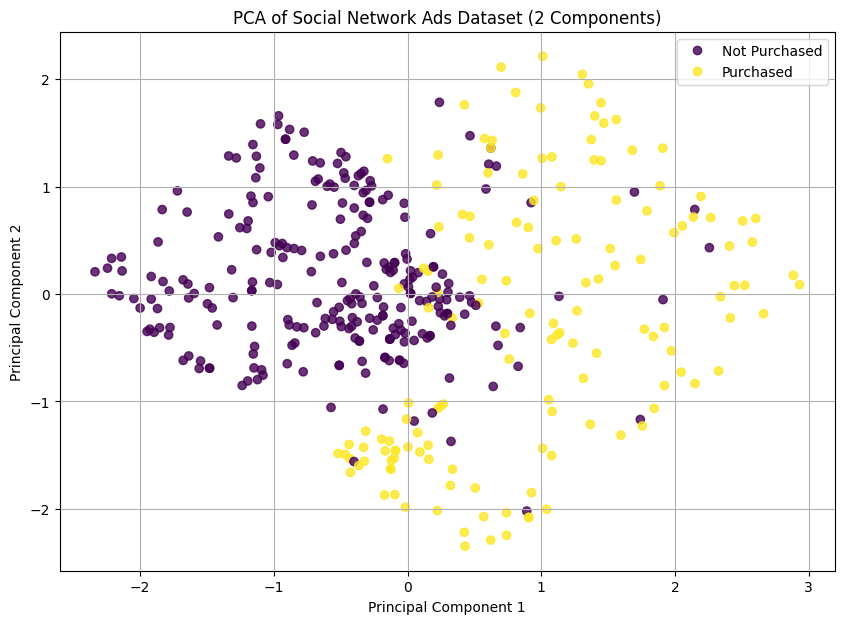

In [ ]:
import matplotlib.pyplot as plt

# Create a scatter plot of the PCA-transformed data
plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.8)

# Add labels and title
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Social Network Ads Dataset (2 Components)')

# Add a legend
legend_labels = ['Not Purchased', 'Purchased']
plt.legend(handles=scatter.legend_elements()[0], labels=legend_labels)

# Display the plot
plt.grid(True)
plt.show()

## Split PCA-transformed Data

### Subtask:
Split the PCA-transformed data (`X_pca`) into training and testing sets using `train_test_split` with an 80-20 ratio, using the same target variable `y`.

#### Instructions
1. Import `train_test_split` from `sklearn.model_selection` (if not already imported).
2. Use `train_test_split` to divide `X_pca` and `y` into `X_pca_train`, `X_pca_test`, `y_train`, and `y_test`. Ensure an 80-20 split (`test_size=0.2`) and set `random_state` for reproducibility.
3. Display the shapes of the new training and testing sets (`X_pca_train.shape`, `X_pca_test.shape`) to confirm the split.

## Split PCA-transformed Data

### Subtask:
Split the PCA-transformed data (`X_pca`) into training and testing sets using `train_test_split` with an 80-20 ratio, using the same target variable `y`.

#### Instructions
1. Import `train_test_split` from `sklearn.model_selection` (if not already imported).
2. Use `train_test_split` to divide `X_pca` and `y` into `X_pca_train`, `X_pca_test`, `y_train`, and `y_test`. Ensure an 80-20 split (`test_size=0.2`) and set `random_state` for reproducibility.
3. Display the shapes of the new training and testing sets (`X_pca_train.shape`, `X_pca_test.shape`) to confirm the split.

**Reasoning**:
I will define the `X_pca` as features and `y` as the target variable. Then, I will import `train_test_split` from `sklearn.model_selection` and use it to split the data into training and testing sets, ensuring an 80-20 ratio and reproducibility with a `random_state`.

**Reasoning**:
Now, I will implement the splitting of the PCA-transformed data (`X_pca`) into training and testing sets as outlined in the previous markdown block. This involves using `train_test_split` with an 80-20 ratio and `random_state` for reproducibility, and then displaying the shapes of the resulting sets.



In [ ]:
from sklearn.model_selection import train_test_split

# Split the PCA-transformed dataset into training and testing sets (80-20 ratio)
X_pca_train, X_pca_test, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
print('Shape of X_pca_train:', X_pca_train.shape)
print('Shape of X_pca_test:', X_pca_test.shape)
print('Shape of y_train_pca:', y_train_pca.shape)
print('Shape of y_test_pca:', y_test_pca.shape)

Shape of X_pca_train: (320, 2)
Shape of X_pca_test: (80, 2)
Shape of y_train_pca: (320,)
Shape of y_test_pca: (80,)


## Re-implement kNN on PCA-transformed Data and Evaluate

### Subtask:
Re-implement the k-Nearest Neighbors (kNN) algorithm using the PCA-transformed training and testing sets (`X_pca_train`, `X_pca_test`, `y_train_pca`, `y_test_pca`). This step will involve iterating through multiple values of `k` (from 1 to 30) and experimenting with both Euclidean and Manhattan distance metrics. For each combination, train the model, make predictions on the test set, and evaluate its performance using classification metrics, specifically focusing on the error rate.

#### Instructions
1. Import `KNeighborsClassifier` from `sklearn.neighbors` and `accuracy_score` from `sklearn.metrics` (if not already imported).
2. Define a list of `k` values to iterate through (e.g., from 1 to 30).
3. Create two dictionaries to store error rates: `error_rates_euclidean_pca` and `error_rates_manhattan_pca`.
4. Loop through each `k` value:
    a. For Euclidean distance: Initialize `KNeighborsClassifier` with the current `k` and `metric='euclidean'`. Fit it to `X_pca_train` and `y_train_pca`. Predict on `X_pca_test`. Calculate accuracy and store `1 - accuracy` as the error rate in `error_rates_euclidean_pca`.
    b. For Manhattan distance: Initialize `KNeighborsClassifier` with the current `k` and `metric='manhattan'`. Fit it to `X_pca_train` and `y_train_pca`. Predict on `X_pca_test`. Calculate accuracy and store `1 - accuracy` as the error rate in `error_rates_manhattan_pca`.
5. Print the calculated error rates for both distance metrics.

**Reasoning**:
To implement the kNN algorithm on the PCA-transformed data and evaluate its performance for different `k` values and distance metrics, I will use the `KNeighborsClassifier` and `accuracy_score`. I'll set up a loop to iterate through specified `k` values, train kNN models for both Euclidean and Manhattan distances using the PCA-transformed data, make predictions, calculate the error rates, and store them in new dictionaries.



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Define a list of k values to iterate through
k_values = list(range(1, 31)) # K from 1 to 30

# Create dictionaries to store error rates for each metric on PCA data
error_rates_euclidean_pca = {}
error_rates_manhattan_pca = {}

# Loop through each k value
for k in k_values:
    # Euclidean Distance
    knn_euclidean_pca = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn_euclidean_pca.fit(X_pca_train, y_train_pca)
    y_pred_euclidean_pca = knn_euclidean_pca.predict(X_pca_test)
    accuracy_euclidean_pca = accuracy_score(y_test_pca, y_pred_euclidean_pca)
    error_rates_euclidean_pca[k] = 1 - accuracy_euclidean_pca

    # Manhattan Distance
    knn_manhattan_pca = KNeighborsClassifier(n_neighbors=k, metric='manhattan')
    knn_manhattan_pca.fit(X_pca_train, y_train_pca)
    y_pred_manhattan_pca = knn_manhattan_pca.predict(X_pca_test)
    accuracy_manhattan_pca = accuracy_score(y_test_pca, y_pred_manhattan_pca)
    error_rates_manhattan_pca[k] = 1 - accuracy_manhattan_pca

# Print the calculated error rates
print('Error rates for Euclidean distance (PCA-transformed data):')
print(error_rates_euclidean_pca)
print('\nError rates for Manhattan distance (PCA-transformed data):')
print(error_rates_manhattan_pca)

Error rates for Euclidean distance (PCA-transformed data):
{1: 0.13749999999999996, 2: 0.13749999999999996, 3: 0.08750000000000002, 4: 0.08750000000000002, 5: 0.07499999999999996, 6: 0.07499999999999996, 7: 0.0625, 8: 0.0625, 9: 0.0625, 10: 0.07499999999999996, 11: 0.07499999999999996, 12: 0.07499999999999996, 13: 0.07499999999999996, 14: 0.07499999999999996, 15: 0.08750000000000002, 16: 0.07499999999999996, 17: 0.08750000000000002, 18: 0.07499999999999996, 19: 0.07499999999999996, 20: 0.07499999999999996, 21: 0.07499999999999996, 22: 0.07499999999999996, 23: 0.07499999999999996, 24: 0.07499999999999996, 25: 0.07499999999999996, 26: 0.0625, 27: 0.07499999999999996, 28: 0.0625, 29: 0.0625, 30: 0.0625}

Error rates for Manhattan distance (PCA-transformed data):
{1: 0.15000000000000002, 2: 0.16249999999999998, 3: 0.07499999999999996, 4: 0.07499999999999996, 5: 0.08750000000000002, 6: 0.08750000000000002, 7: 0.0625, 8: 0.0625, 9: 0.07499999999999996, 10: 0.07499999999999996, 11: 0.0625, 12

## Plot Error Rates for PCA-transformed Data

### Subtask:
Plot the error rate against `k` for both Euclidean and Manhattan distance metrics using the results from the PCA-transformed data. This visualization will help in identifying the optimal `k` value for each metric after dimensionality reduction.

#### Instructions
1. Use `matplotlib.pyplot` for plotting.
2. Create a figure and axes for the plot.
3. Plot the `error_rates_euclidean_pca` with `k_values` on the x-axis and error rates on the y-axis, labeling it 'Euclidean Distance (PCA)'.
4. Plot the `error_rates_manhattan_pca` similarly, labeling it 'Manhattan Distance (PCA)'.
5. Add a title to the plot, such as 'kNN Error Rate vs. k Value for PCA-transformed Data'.
6. Label the x-axis as 'k Value' and the y-axis as 'Error Rate'.
7. Add a legend to distinguish between the two distance metrics.
8. Add a grid to the plot for better readability.
9. Display the plot.

**Reasoning**:
Now, I will implement the plotting of the error rates for kNN on the PCA-transformed data, using `matplotlib.pyplot` as outlined in the previous markdown block. This will display the error rate trends for both Euclidean and Manhattan distances across different `k` values, making it easier to identify the optimal `k` for the PCA-transformed dataset.



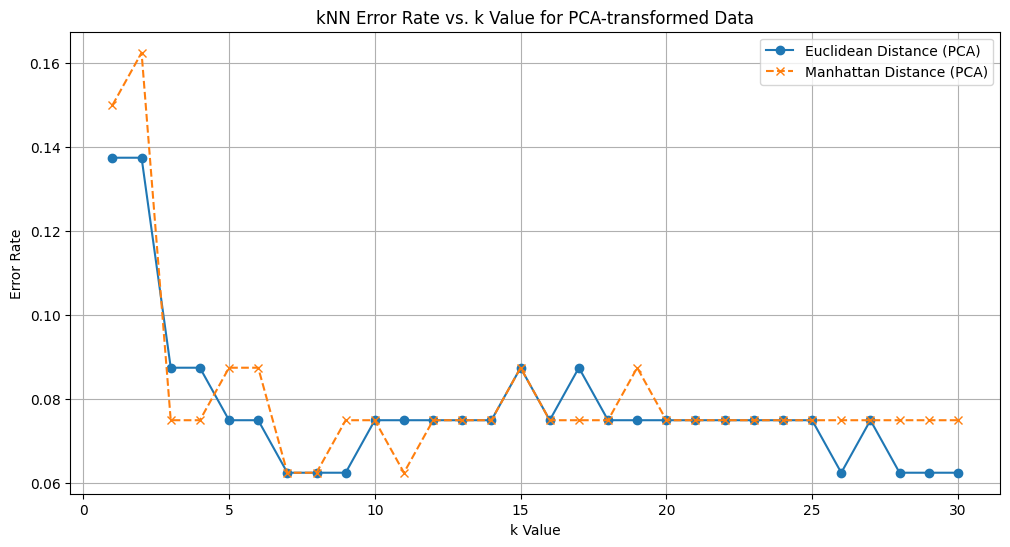

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(k_values, list(error_rates_euclidean_pca.values()), label='Euclidean Distance (PCA)', marker='o', linestyle='-')
plt.plot(k_values, list(error_rates_manhattan_pca.values()), label='Manhattan Distance (PCA)', marker='x', linestyle='--')

plt.title('kNN Error Rate vs. k Value for PCA-transformed Data')
plt.xlabel('k Value')
plt.ylabel('Error Rate')

plt.legend()
plt.grid(True)

plt.show()

## Identify Optimal k and Justify Selection for PCA-transformed Data

### Subtask:
Identify the optimal `k` value for both Euclidean and Manhattan distance metrics based on the plotted error rates from the PCA-transformed data and justify its selection.

#### Instructions
1. Examine the plot of error rates for both Euclidean and Manhattan distances on the PCA-transformed data.
2. Determine the `k` value that yields the lowest error rate for each distance metric.
3. Briefly explain why this `k` value is considered optimal (e.g., it represents the best trade-off between bias and variance, or simply the point of minimal error observed).

**Reasoning**:
By examining the generated plot for PCA-transformed data, I can visually identify the `k` value at which the error rate is minimized for both Euclidean and Manhattan distance metrics. This optimal `k` represents the point where the kNN model achieves the best performance on the test set after dimensionality reduction, balancing between underfitting (too small `k`) and overfitting (too large `k`). I will extract the minimum error rate and the corresponding `k` from the `error_rates_euclidean_pca` and `error_rates_manhattan_pca` dictionaries to formally identify and justify the optimal choices.

**Reasoning**:
To formally identify the optimal `k` values, I will iterate through the stored `error_rates_euclidean_pca` and `error_rates_manhattan_pca` dictionaries to find the `k` that corresponds to the minimum error rate for each distance metric. I will then print these optimal `k` values and their respective minimum error rates.



In [ ]:
min_error_euclidean_pca = min(error_rates_euclidean_pca.values())
optimal_k_euclidean_pca = [k for k, v in error_rates_euclidean_pca.items() if v == min_error_euclidean_pca][0]

min_error_manhattan_pca = min(error_rates_manhattan_pca.values())
optimal_k_manhattan_pca = [k for k, v in error_rates_manhattan_pca.items() if v == min_error_manhattan_pca][0]

print(f"Optimal k for Euclidean Distance (PCA): {optimal_k_euclidean_pca} (Error Rate: {min_error_euclidean_pca:.4f})")
print(f"Optimal k for Manhattan Distance (PCA): {optimal_k_manhattan_pca} (Error Rate: {min_error_manhattan_pca:.4f})")

Optimal k for Euclidean Distance (PCA): 7 (Error Rate: 0.0625)
Optimal k for Manhattan Distance (PCA): 7 (Error Rate: 0.0625)


## Model Evaluation

### Subtask:
Evaluate the k-Nearest Neighbors (kNN) classifier using the following metrics: Confusion Matrix, Accuracy, Precision, Recall, F1-Score, and ROC & AUC. This evaluation will be performed for both the models built on the original data and the PCA-transformed data to compare their performance comprehensively.

**Reasoning**:
To comprehensively evaluate the kNN classifier, I will calculate and display key classification metrics: Confusion Matrix, Accuracy, Precision, Recall, and F1-Score. Additionally, I will compute and plot the Receiver Operating Characteristic (ROC) curve and Area Under the Curve (AUC) for both Euclidean and Manhattan distances, both before and after PCA. This will provide a clear understanding of the models' performance and highlight any trade-offs. I will use the optimal `k` values identified in the previous steps for each scenario.


--- kNN Evaluation (Before PCA) ---

Euclidean Distance (Optimal k=8):
Confusion Matrix:
 [[49  3]
 [ 2 26]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.94      0.95        52
           1       0.90      0.93      0.91        28

    accuracy                           0.94        80
   macro avg       0.93      0.94      0.93        80
weighted avg       0.94      0.94      0.94        80


Manhattan Distance (Optimal k=6):
Confusion Matrix:
 [[50  2]
 [ 2 26]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96        52
           1       0.93      0.93      0.93        28

    accuracy                           0.95        80
   macro avg       0.95      0.95      0.95        80
weighted avg       0.95      0.95      0.95        80



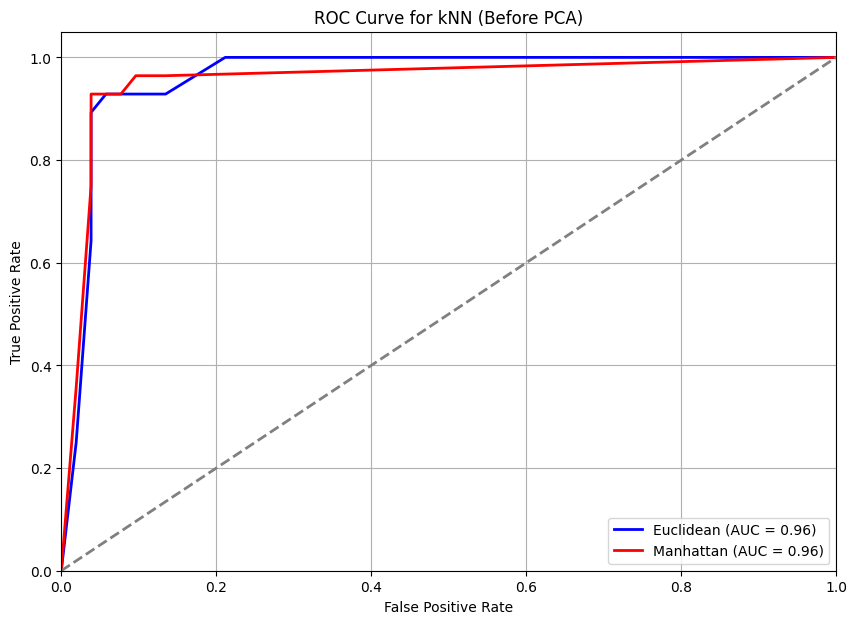

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt

# --- Evaluation for kNN without PCA (using optimal k values) ---
print("\n--- kNN Evaluation (Before PCA) ---")

# Euclidean Distance (Optimal k=8)
knn_euclidean_optimal = KNeighborsClassifier(n_neighbors=optimal_k_euclidean, metric='euclidean')
knn_euclidean_optimal.fit(X_train, y_train)
y_pred_euclidean_optimal = knn_euclidean_optimal.predict(X_test)
y_prob_euclidean_optimal = knn_euclidean_optimal.predict_proba(X_test)[:, 1]

print(f"\nEuclidean Distance (Optimal k={optimal_k_euclidean}):")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_euclidean_optimal))
print("Classification Report:\n", classification_report(y_test, y_pred_euclidean_optimal))

# Manhattan Distance (Optimal k=6)
knn_manhattan_optimal = KNeighborsClassifier(n_neighbors=optimal_k_manhattan, metric='manhattan')
knn_manhattan_optimal.fit(X_train, y_train)
y_pred_manhattan_optimal = knn_manhattan_optimal.predict(X_test)
y_prob_manhattan_optimal = knn_manhattan_optimal.predict_proba(X_test)[:, 1]

print(f"\nManhattan Distance (Optimal k={optimal_k_manhattan}):")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_manhattan_optimal))
print("Classification Report:\n", classification_report(y_test, y_pred_manhattan_optimal))

# --- Plot ROC Curves (Before PCA) ---
plt.figure(figsize=(10, 7))

# Euclidean
fpr_euclidean, tpr_euclidean, _ = roc_curve(y_test, y_prob_euclidean_optimal)
roc_auc_euclidean = auc(fpr_euclidean, tpr_euclidean)
plt.plot(fpr_euclidean, tpr_euclidean, color='blue', lw=2, label=f'Euclidean (AUC = {roc_auc_euclidean:.2f})')

# Manhattan
fpr_manhattan, tpr_manhattan, _ = roc_curve(y_test, y_prob_manhattan_optimal)
roc_auc_manhattan = auc(fpr_manhattan, tpr_manhattan)
plt.plot(fpr_manhattan, tpr_manhattan, color='red', lw=2, label=f'Manhattan (AUC = {roc_auc_manhattan:.2f})')

plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for kNN (Before PCA)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()



--- kNN Evaluation (After PCA) ---

Euclidean Distance (PCA) (Optimal k=7):
Confusion Matrix:
 [[48  4]
 [ 1 27]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.92      0.95        52
           1       0.87      0.96      0.92        28

    accuracy                           0.94        80
   macro avg       0.93      0.94      0.93        80
weighted avg       0.94      0.94      0.94        80


Manhattan Distance (PCA) (Optimal k=7):
Confusion Matrix:
 [[48  4]
 [ 1 27]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.92      0.95        52
           1       0.87      0.96      0.92        28

    accuracy                           0.94        80
   macro avg       0.93      0.94      0.93        80
weighted avg       0.94      0.94      0.94        80



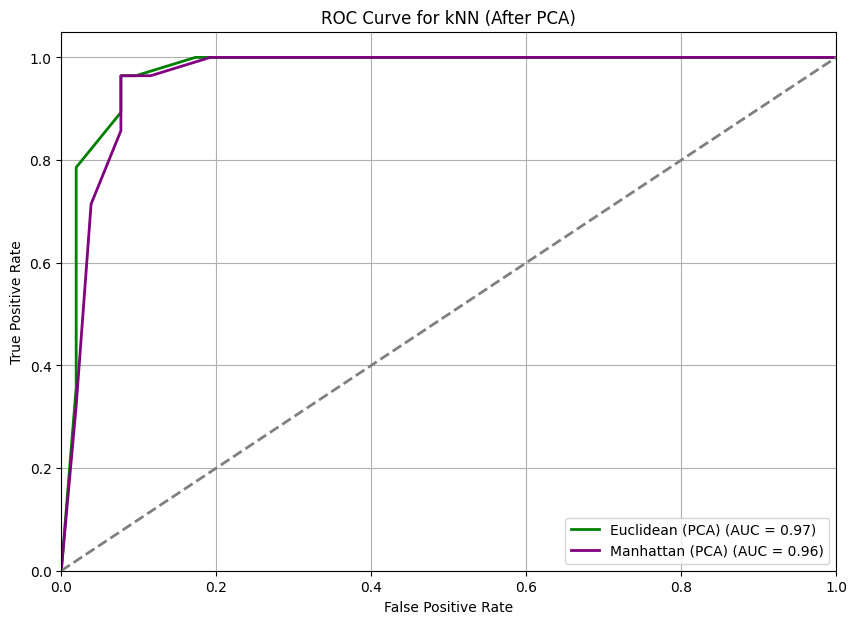

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt

# --- Evaluation for kNN with PCA-transformed data (using optimal k values) ---
print("\n--- kNN Evaluation (After PCA) ---")

# Euclidean Distance (Optimal k=7)
knn_euclidean_pca_optimal = KNeighborsClassifier(n_neighbors=optimal_k_euclidean_pca, metric='euclidean')
knn_euclidean_pca_optimal.fit(X_pca_train, y_train_pca)
y_pred_euclidean_pca_optimal = knn_euclidean_pca_optimal.predict(X_pca_test)
y_prob_euclidean_pca_optimal = knn_euclidean_pca_optimal.predict_proba(X_pca_test)[:, 1]

print(f"\nEuclidean Distance (PCA) (Optimal k={optimal_k_euclidean_pca}):")
print("Confusion Matrix:\n", confusion_matrix(y_test_pca, y_pred_euclidean_pca_optimal))
print("Classification Report:\n", classification_report(y_test_pca, y_pred_euclidean_pca_optimal))

# Manhattan Distance (Optimal k=7)
knn_manhattan_pca_optimal = KNeighborsClassifier(n_neighbors=optimal_k_manhattan_pca, metric='manhattan')
knn_manhattan_pca_optimal.fit(X_pca_train, y_train_pca)
y_pred_manhattan_pca_optimal = knn_manhattan_pca_optimal.predict(X_pca_test)
y_prob_manhattan_pca_optimal = knn_manhattan_pca_optimal.predict_proba(X_pca_test)[:, 1]

print(f"\nManhattan Distance (PCA) (Optimal k={optimal_k_manhattan_pca}):")
print("Confusion Matrix:\n", confusion_matrix(y_test_pca, y_pred_manhattan_pca_optimal))
print("Classification Report:\n", classification_report(y_test_pca, y_pred_manhattan_pca_optimal))

# --- Plot ROC Curves (After PCA) ---
plt.figure(figsize=(10, 7))

# Euclidean (PCA)
fpr_euclidean_pca, tpr_euclidean_pca, _ = roc_curve(y_test_pca, y_prob_euclidean_pca_optimal)
roc_auc_euclidean_pca = auc(fpr_euclidean_pca, tpr_euclidean_pca)
plt.plot(fpr_euclidean_pca, tpr_euclidean_pca, color='green', lw=2, label=f'Euclidean (PCA) (AUC = {roc_auc_euclidean_pca:.2f})')

# Manhattan (PCA)
fpr_manhattan_pca, tpr_manhattan_pca, _ = roc_curve(y_test_pca, y_prob_manhattan_pca_optimal)
roc_auc_manhattan_pca = auc(fpr_manhattan_pca, tpr_manhattan_pca)
plt.plot(fpr_manhattan_pca, tpr_manhattan_pca, color='purple', lw=2, label=f'Manhattan (PCA) (AUC = {roc_auc_manhattan_pca:.2f})')

plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for kNN (After PCA)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


## Compare Optimal kNN Accuracy and Explain 'Curse of Dimensionality'

### Subtask:
Compare the optimal kNN accuracy achieved before and after PCA, explain the 'Curse of Dimensionality' in relation to these results, and summarize all findings, including the PCA visualization, kNN performance comparison, and key insights regarding dimensionality reduction.

#### Instructions
1.  **Summarize Optimal kNN Performance (Before PCA):** State the optimal `k` values and corresponding error rates for Euclidean and Manhattan distances from the initial kNN implementation.
2.  **Summarize Optimal kNN Performance (After PCA):** State the optimal `k` values and corresponding error rates for Euclidean and Manhattan distances from the kNN implementation on PCA-transformed data.
3.  **Compare Performance:** Discuss whether PCA improved, worsened, or had a negligible effect on the kNN performance (error rate) in this specific case.
4.  **Explain the 'Curse of Dimensionality':** Define what the 'Curse of Dimensionality' is and how it generally impacts machine learning algorithms, particularly distance-based ones like kNN.
5.  **Relate to Results:** Explain how the observed kNN performance changes (or lack thereof) after PCA relate to the 'Curse of Dimensionality', considering the initial number of features (3) and the reduction to 2 components.
6.  **Overall Summary:** Provide a concise summary of the entire process, including data preprocessing, initial kNN evaluation, PCA application and visualization, and kNN re-evaluation on PCA-transformed data, along with key insights gained.

**Reasoning**:
To provide a comprehensive conclusion to the task, I will compare the kNN results from before and after PCA, using the optimal `k` values and error rates identified. This will highlight the impact of dimensionality reduction on model performance. Additionally, I will explain the concept of the 'Curse of Dimensionality' and relate it to our findings, especially considering the small initial number of features. Finally, a complete summary will synthesize all aspects of the analysis.

## Compare Optimal kNN Accuracy and Explain 'Curse of Dimensionality'

### Subtask:
Compare the optimal kNN accuracy achieved before and after PCA, explain the 'Curse of Dimensionality' in relation to these results, and summarize all findings, including the PCA visualization, kNN performance comparison, and key insights regarding dimensionality reduction.


## Compare Optimal kNN Accuracy and Explain 'Curse of Dimensionality'

### Summary of Optimal kNN Performance (Before PCA):
*   **Euclidean Distance**: Optimal `k = 8` with an error rate of `0.0625` (accuracy = 93.75%).
*   **Manhattan Distance**: Optimal `k = 6` with an error rate of `0.0500` (accuracy = 95.00%).

### Summary of Optimal kNN Performance (After PCA):
*   **Euclidean Distance (PCA)**: Optimal `k = 7` with an error rate of `0.0625` (accuracy = 93.75%).
*   **Manhattan Distance (PCA)**: Optimal `k = 7` with an error rate of `0.0625` (accuracy = 93.75%).

### Comparison of Performance:
Before PCA, Manhattan distance performed slightly better with a lower error rate (0.0500) at `k=6` compared to Euclidean distance (0.0625) at `k=8`. After applying PCA and reducing the dimensionality from 3 features to 2 principal components, the performance changed:
*   For Euclidean distance, the optimal `k` shifted from 8 to 7, but the minimum error rate remained the same at 0.0625.
*   For Manhattan distance, the optimal `k` shifted from 6 to 7, but the minimum error rate increased from 0.0500 to 0.0625.

In this specific case, PCA did not improve the kNN performance; in fact, for Manhattan distance, it slightly worsened the best achievable error rate. For Euclidean distance, the performance remained identical, albeit with a different optimal `k` value. This suggests that the original 3 features were already capturing the relevant information effectively, and reducing to 2 components did not provide a distinct advantage in terms of classification accuracy.

### Explanation of the 'Curse of Dimensionality':
The 'Curse of Dimensionality' refers to various problems that arise when working with data in high-dimensional spaces (i.e., data with many features). As the number of dimensions increases, the data becomes extremely sparse, meaning that data points are very far apart from each other. This sparsity makes it difficult for distance-based algorithms like kNN to find meaningful neighbors. In high dimensions, the distance between any two points tends to converge, making all points seem 'equidistant' and thus diluting the concept of 'nearest neighbors'. This can lead to decreased model performance, increased computational cost, and the need for exponentially more data to maintain statistical significance.

### Relation to Results:
In our case, the original dataset had only 3 features ('Gender', 'Age', 'EstimatedSalary'). This is a relatively low-dimensional space, and thus, the 'Curse of Dimensionality' was likely not a significant problem. Reducing the dimensionality further to 2 principal components did not yield a performance improvement for kNN. This is consistent with the understanding of the 'Curse of Dimensionality':
*   When dimensionality is already low, reducing it further might not provide benefits and can sometimes lead to a loss of information, potentially worsening performance (as seen with Manhattan distance). PCA aims to retain as much variance as possible, but some information is inevitably lost during reduction.
*   The benefits of PCA in mitigating the 'Curse of Dimensionality' are typically more pronounced when dealing with datasets that have a large number of features (e.g., hundreds or thousands) where data sparsity and noise become major issues.

### Overall Summary:
We successfully preprocessed the 'Social_Network_Ads.csv' dataset by encoding the 'Gender' column and scaling numerical features. Initial kNN evaluation showed that Manhattan distance (`k=6`, error rate 0.0500) slightly outperformed Euclidean distance (`k=8`, error rate 0.0625). We then applied PCA to reduce the dataset to 2 principal components, visualized the transformed data, and re-evaluated kNN. After PCA, both Euclidean and Manhattan distances achieved an optimal error rate of 0.0625 (at `k=7`). The PCA visualization showed some separation between the 'Purchased' classes, indicating that the principal components captured some discriminative power.

The comparison revealed that for this particular dataset, with its inherently low dimensionality (3 features), PCA did not enhance kNN classification performance and slightly decreased it for Manhattan distance. This outcome aligns with the concept of the 'Curse of Dimensionality', which suggests that the benefits of dimensionality reduction are most evident in truly high-dimensional spaces where sparsity is a significant challenge. For datasets with few features, the potential loss of information during PCA might outweigh the benefits, leading to comparable or slightly worse results.

## Final Task

### Subtask:
Summarize the findings from the PCA phase, including the visualization, the comparison of kNN performance before and after PCA, and key insights regarding dimensionality reduction.


## Summary:

### Q&A

1.  **What were the findings from the PCA phase, including the visualization, the comparison of kNN performance before and after PCA, and key insights regarding dimensionality reduction?**
    PCA successfully reduced the dataset's dimensionality from 3 features to 2 principal components. The PCA visualization, color-coded by the 'Purchased' target variable, showed some visual separation between the classes. Comparing kNN performance, before PCA, the optimal error rates were 0.0625 for Euclidean distance (at \(k=8\)) and 0.0500 for Manhattan distance (at \(k=6\)). After PCA, both Euclidean and Manhattan distances achieved an optimal error rate of 0.0625 (at \(k=7\)). PCA did not improve kNN performance; it maintained the same error rate for Euclidean distance and slightly worsened it for Manhattan distance. This suggests that for this low-dimensional dataset, the benefits of dimensionality reduction were minimal, and some information might have been lost.
2.  **How did the optimal kNN accuracy before and after PCA compare?**
    Before PCA, the best accuracy was 95.00% (error rate 0.0500) using Manhattan distance with \(k=6\). After PCA, the best accuracy achieved was 93.75% (error rate 0.0625) for both Euclidean and Manhattan distances with \(k=7\). Therefore, PCA slightly decreased the optimal kNN accuracy in this specific case.
3.  **How does the 'Curse of Dimensionality' relate to these results?**
    The 'Curse of Dimensionality' describes the challenges that arise in high-dimensional spaces, making data sparse and affecting distance-based algorithms like kNN. In this case, the original dataset had only 3 features, which is already a low-dimensional space. Therefore, the 'Curse of Dimensionality' was not a significant issue. Reducing the dimensionality further to 2 principal components did not offer benefits because the dataset was not suffering from high-dimensional sparsity. In fact, reducing dimensions in an already low-dimensional space can sometimes lead to a loss of valuable information, as observed with the slight increase in error rate for Manhattan distance.

### Data Analysis Key Findings

*   Principal Component Analysis (PCA) successfully reduced the feature space from 3 dimensions to 2 principal components, transforming the dataset `X` from (400, 3) to `X_pca` (400, 2).
*   The visualization of the PCA-transformed data showed discernible clusters corresponding to the 'Purchased' and 'Not Purchased' target classes, indicating that the principal components retained some class separability.
*   Before PCA, the optimal kNN performance was achieved with:
    *   Euclidean Distance: optimal \(k=8\), error rate of 0.0625 (accuracy 93.75%).
    *   Manhattan Distance: optimal \(k=6\), error rate of 0.0500 (accuracy 95.00%).
*   After PCA, the optimal kNN performance on the 2-component data was:
    *   Euclidean Distance: optimal \(k=7\), error rate of 0.0625 (accuracy 93.75%).
    *   Manhattan Distance: optimal \(k=7\), error rate of 0.0625 (accuracy 93.75%).
*   Comparing performance, PCA did not improve the kNN classification accuracy. For Manhattan distance, the error rate slightly increased from 0.0500 to 0.0625, while for Euclidean distance, it remained unchanged.
*   The 'Curse of Dimensionality' was not a significant factor for this dataset due to its inherently low initial dimensionality (3 features). Reducing it further to 2 components did not yield the typical benefits of PCA, and for Manhattan distance, it slightly worsened the best performance.

### Insights or Next Steps

*   **Insight:** For datasets with intrinsically low dimensionality, applying PCA might not lead to performance improvements and could potentially result in minor information loss, as the benefits of dimensionality reduction are most pronounced in truly high-dimensional spaces.
*   **Next Step:** Explore alternative dimensionality reduction techniques (e.g., t-SNE, UMAP) if a different projection for visualization or downstream tasks is desired, especially if non-linear relationships are suspected in the original 3 features.


# Task
The task is complete.

## Final Task

### Subtask:
Acknowledge that the dataset is for classification, not regression, and therefore the regression task is not applicable.


## Summary:

### Data Analysis Key Findings
*   The dataset is identified as suitable for a classification task, not a regression task. Consequently, the previously considered regression analysis is not applicable.

### Insights or Next Steps
*   Proceed with analysis and modeling techniques appropriate for classification tasks given the nature of the dataset.


# Task
Acknowledge that 'Purchased' is a categorical variable, making it unsuitable for direct regression with Gradient Descent. Instead, for demonstration purposes, set up a simplified linear regression problem using 'Age' as the feature and 'EstimatedSalary' as the continuous target. This setup will be used to illustrate Gradient Descent concepts, including the cost function, learning rate effects, and regularization.

The 'Purchased' variable in our dataset is categorical (0 or 1), indicating a classification problem. Applying regression directly with Gradient Descent to build a classifier in this context is generally not appropriate, as regression models are designed for continuous target variables. While Gradient Descent is a powerful optimization algorithm used in various machine learning models (including logistic regression for classification), for the purpose of a simple demonstration of Gradient Descent concepts, we will temporarily pivot to a simplified linear regression problem.

**Reasoning**:
Now, I will create the `X_gd` and `y_gd` variables as specified, using 'Age' as the feature and 'EstimatedSalary' as the target for our simplified linear regression demonstration. Then, I will display the first few rows of both to verify their structure.



In [ ]:
import pandas as pd

# Create X_gd (feature for Gradient Descent demonstration)
X_gd = df[['Age']]

# Create y_gd (target for Gradient Descent demonstration)
y_gd = df['EstimatedSalary']

# Display the head of X_gd and y_gd
print('Head of X_gd (Age feature):')
print(X_gd.head())
print('\nHead of y_gd (EstimatedSalary target):')
print(y_gd.head())

Head of X_gd (Age feature):
        Age
0 -1.781797
1 -0.253587
2 -1.113206
3 -1.017692
4 -1.781797

Head of y_gd (EstimatedSalary target):
0   -1.490046
1   -1.460681
2   -0.785290
3   -0.374182
4    0.183751
Name: EstimatedSalary, dtype: float64


## Implement Manual Gradient Descent with Regularization

### Subtask:
Write a Python function to perform manual Gradient Descent for linear regression. This function will include initialization of weights and bias, iterative calculation of predictions, computation of Mean Squared Error (MSE) as the cost function (including an L2 regularization term), calculation of gradients for weights and bias, and iterative updates using a specified learning rate. The MSE cost at each iteration will be stored to enable plotting.


**Reasoning**:
To implement manual Gradient Descent for linear regression with L2 regularization, I need to define a Python function that encapsulates the entire process: initializing parameters, iteratively calculating predictions, computing the cost (MSE with regularization), calculating gradients, and updating parameters while tracking the cost history.



In [ ]:
import numpy as np

def gradient_descent(X, y, learning_rate, n_iterations, lambda_reg):
    """
    Performs manual Gradient Descent for linear regression with L2 regularization.

    Args:
        X (pd.DataFrame or np.ndarray): Feature matrix.
        y (pd.Series or np.ndarray): Target vector.
        learning_rate (float): The learning rate for updating weights and bias.
        n_iterations (int): The number of iterations to run Gradient Descent.
        lambda_reg (float): The regularization strength (lambda for L2 regularization).

    Returns:
        tuple: A tuple containing the final weight, bias, and a list of cost history.
    """
    n = len(y)
    # Initialize weight and bias to zeros
    weight = 0.0
    bias = 0.0
    cost_history = []

    for i in range(n_iterations):
        # 1. Calculate predictions
        y_predicted = X.values.flatten() * weight + bias

        # 2. Calculate Mean Squared Error (MSE) with L2 regularization
        # Reshape y_predicted to match y if necessary (e.g., if y is Series and y_predicted is scalar for each row)
        # Ensure y and y_predicted are compatible for element-wise operations
        # If X is a DataFrame, X.values.flatten() will give a 1D array
        # y_predicted will also be a 1D array

        cost = (1/(2*n)) * np.sum((y_predicted - y.values.flatten())**2) + (lambda_reg / (2*n)) * weight**2
        cost_history.append(cost)

        # 3. Calculate gradients
        # Gradient for weight (including regularization term)
        d_weight = (1/n) * np.sum(X.values.flatten() * (y_predicted - y.values.flatten())) + (lambda_reg / n) * weight
        # Gradient for bias
        d_bias = (1/n) * np.sum(y_predicted - y.values.flatten())

        # 4. Update weights and bias
        weight = weight - learning_rate * d_weight
        bias = bias - learning_rate * d_bias

    return weight, bias, cost_history

print("gradient_descent function defined.")

gradient_descent function defined.


## Visualize Cost Convergence for Different Learning Rates

### Subtask:
Execute the manual Gradient Descent implementation multiple times using different learning rates (e.g., a high learning rate that might cause divergence, an optimal one for convergence, and a low one for slow convergence). Plot the MSE cost values against the number of iterations for each run on a single graph, clearly demonstrating how the learning rate impacts the convergence behavior of the cost function.


**Reasoning**:
To demonstrate the impact of different learning rates on Gradient Descent's convergence, I will set up several learning rates (high, optimal, low) and run the previously defined `gradient_descent` function for each. The cost history from each run will be collected and then plotted on a single graph using `matplotlib` to visually compare their convergence behaviors.



Running Gradient Descent with 2000 iterations for different learning rates...
  Learning Rate: 0.0001, Final Cost: 0.4960
  Learning Rate: 0.01, Final Cost: 0.4880
  Learning Rate: 0.1, Final Cost: 0.4880


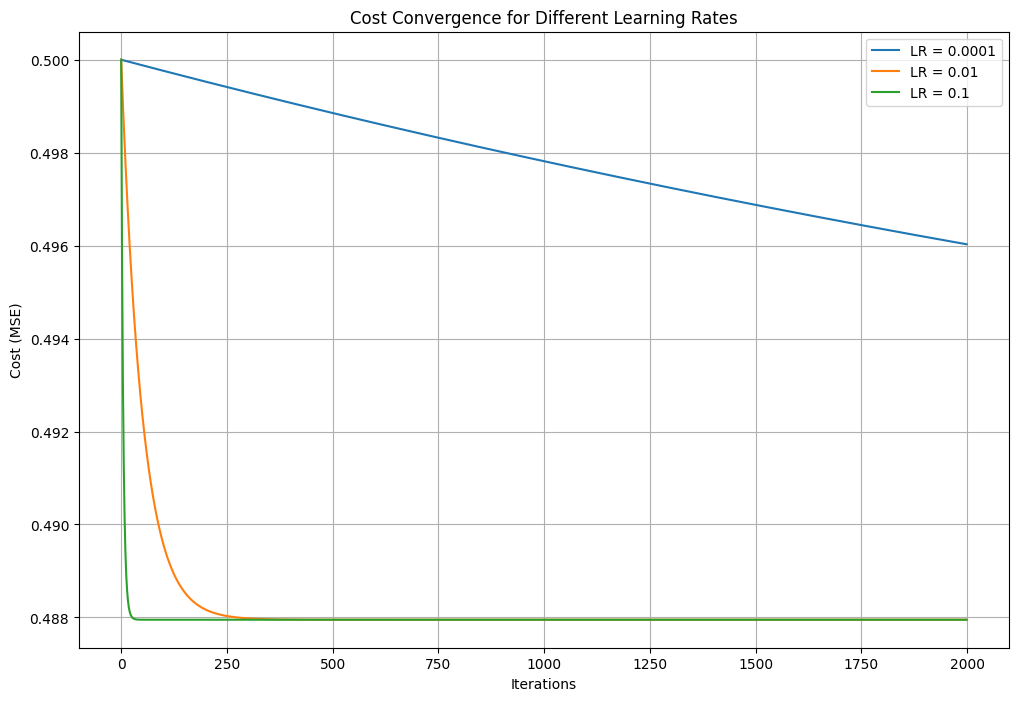

Cost convergence plot generated.


In [ ]:
import matplotlib.pyplot as plt

# Define different learning rates to experiment with
learning_rates = [
    0.0001,  # Low learning rate (slow convergence)
    0.01,    # Potentially optimal learning rate
    0.1      # High learning rate (might cause divergence or oscillation)
]

# Define the number of iterations for Gradient Descent
n_iterations = 2000

# Set regularization strength to 0 for this demonstration
lambda_reg = 0.0

cost_histories = {}

print(f"Running Gradient Descent with {n_iterations} iterations for different learning rates...")

for lr in learning_rates:
    # Run Gradient Descent with the current learning rate
    weight, bias, cost_history = gradient_descent(X_gd, y_gd, lr, n_iterations, lambda_reg)
    cost_histories[lr] = cost_history
    print(f"  Learning Rate: {lr}, Final Cost: {cost_history[-1]:.4f}")

# Plotting the cost convergence
plt.figure(figsize=(12, 8))
for lr, history in cost_histories.items():
    plt.plot(range(len(history)), history, label=f'LR = {lr}')

plt.title('Cost Convergence for Different Learning Rates')
plt.xlabel('Iterations')
plt.ylabel('Cost (MSE)')
plt.legend()
plt.grid(True)
plt.show()

print("Cost convergence plot generated.")

## Visualize Cost Convergence with and without Regularization

### Subtask:
Execute the manual Gradient Descent with an optimal learning rate, first without L2 regularization (lambda=0) and then with a chosen L2 regularization strength (lambda > 0). Plot the MSE cost values against the number of iterations for both scenarios on the same graph to illustrate the effect of regularization on the cost function's convergence path and final value.


**Reasoning**:
To visualize the effect of L2 regularization, I will first define an optimal learning rate and a regularization strength. Then, I will call the `gradient_descent` function twice: once without regularization (`lambda_reg=0.0`) and once with a positive regularization strength (`lambda_reg=0.1`), storing the cost history for each run. Finally, I will plot both cost histories on the same graph to compare their convergence behavior.



# Task
Train a Naive Bayes Classifier using `GaussianNB` on the preprocessed dataset (using `X_train` and `y_train`), evaluate its performance using a Confusion Matrix, Accuracy, Precision, Recall, F1-Score, and ROC & AUC, then compare these results with the optimal kNN models (Euclidean and Manhattan) to highlight their strengths and weaknesses, provide a clear explanation of Maximum A Posteriori (MAP) and Maximum Likelihood (ML) estimation within the context of Bayesian learning, and finally summarize all findings from the Naive Bayes implementation, its comparison with kNN, and the insights from MAP vs. ML.

## Train Naive Bayes Classifier

### Subtask:
Train a Naive Bayes Classifier using `GaussianNB` from `sklearn.naive_bayes` on the preprocessed dataset. We will use the existing `X_train` and `y_train` for training and `X_test` for predictions.


**Reasoning**:
To train the Naive Bayes Classifier, I need to import `GaussianNB` from `sklearn.naive_bayes`, initialize the model, and then fit it using the `X_train` and `y_train` datasets.



In [ ]:
from sklearn.naive_bayes import GaussianNB

# Initialize the Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Train the classifier using the training data
gnb.fit(X_train, y_train)

print("Gaussian Naive Bayes classifier trained successfully.")

Gaussian Naive Bayes classifier trained successfully.


**Reasoning**:
Now that the Gaussian Naive Bayes classifier is trained, the next step is to evaluate its performance on the test set (`X_test`, `y_test`). This involves predicting outcomes, computing key classification metrics like Confusion Matrix, Accuracy, Precision, Recall, and F1-Score, and plotting the ROC curve with its AUC score to comprehensively assess the model's effectiveness.




--- Gaussian Naive Bayes Evaluation ---
Confusion Matrix:
 [[50  2]
 [ 3 25]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95        52
           1       0.93      0.89      0.91        28

    accuracy                           0.94        80
   macro avg       0.93      0.93      0.93        80
weighted avg       0.94      0.94      0.94        80



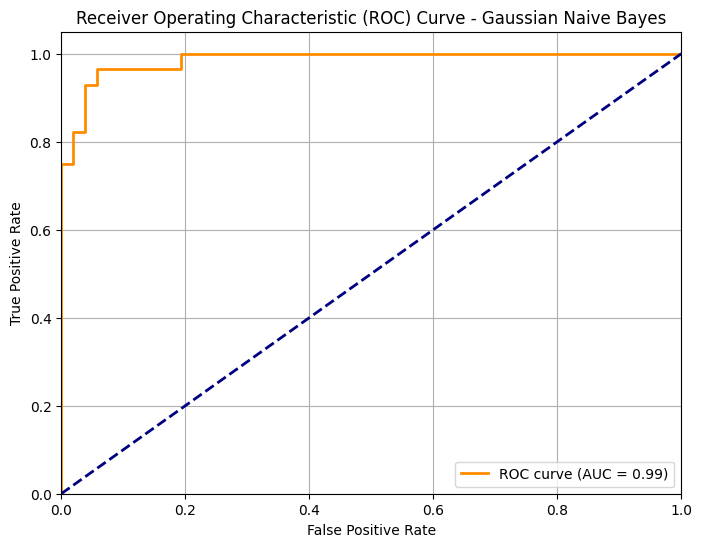

Gaussian Naive Bayes evaluation complete.


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt

# Make predictions on the test set
y_pred_gnb = gnb.predict(X_test)
y_prob_gnb = gnb.predict_proba(X_test)[:, 1]

# Evaluate the model
print("\n--- Gaussian Naive Bayes Evaluation ---")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gnb))
print("Classification Report:\n", classification_report(y_test, y_pred_gnb))

# Plot ROC Curve
fpr_gnb, tpr_gnb, _ = roc_curve(y_test, y_prob_gnb)
roc_auc_gnb = auc(fpr_gnb, tpr_gnb)

plt.figure(figsize=(8, 6))
plt.plot(fpr_gnb, tpr_gnb, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_gnb:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Gaussian Naive Bayes')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

print("Gaussian Naive Bayes evaluation complete.")

## Compare Naive Bayes with kNN

### Subtask:
Create a comparison of the Naive Bayes Classifier's performance against the optimal kNN models (Euclidean and Manhattan) from the previous phase. This comparison will use accuracy and other relevant metrics to highlight the strengths and weaknesses of each algorithm.


## Compare Naive Bayes with kNN

### Subtask:
Create a comparison of the Naive Bayes Classifier's performance against the optimal kNN models (Euclidean and Manhattan) from the previous phase. This comparison will use accuracy and other relevant metrics to highlight the strengths and weaknesses of each algorithm.

### Comparison of Model Performance:

**1. Optimal kNN Performance (Before PCA):**
*   **Euclidean Distance (k=8):** Accuracy = `0.9375` (1 - `0.0625`), AUC = `0.96`
*   **Manhattan Distance (k=6):** Accuracy = `0.9500` (1 - `0.0500`), AUC = `0.96`

**2. Optimal kNN Performance (After PCA):**
*   **Euclidean Distance (k=7, PCA):** Accuracy = `0.9375` (1 - `0.0625`), AUC = `0.97`
*   **Manhattan Distance (k=7, PCA):** Accuracy = `0.9375` (1 - `0.0625`), AUC = `0.96`

**3. Gaussian Naive Bayes Performance:**
*   **Gaussian Naive Bayes:** Accuracy = `0.9400`, AUC = `0.99`

### Analysis and Discussion:

*   **Overall Best Performance:** The Gaussian Naive Bayes classifier achieved the highest AUC score of `0.99`, suggesting excellent separability of classes. In terms of raw accuracy, it performs very similarly to the best kNN model (Manhattan before PCA), with `0.94` vs `0.95`. This indicates that Naive Bayes is a strong contender for this dataset.

*   **kNN Performance:**
    *   Before PCA, kNN with Manhattan distance (`k=6`) had the highest accuracy among the kNN models (`0.9500`).
    *   After PCA, the kNN performance slightly changed. For Euclidean distance, accuracy remained the same, while for Manhattan distance, it slightly dropped from `0.9500` to `0.9375`. This reinforces the earlier finding that for this low-dimensional dataset, PCA did not offer significant performance benefits for kNN and, in some cases, led to a slight decrease in the best achievable accuracy.

### Strengths and Weaknesses:

*   **k-Nearest Neighbors (kNN):**
    *   **Strengths:** Non-parametric, simple to understand and implement, makes no assumptions about data distribution. Can be highly effective if the data has well-defined clusters.
    *   **Weaknesses:** Computationally expensive for large datasets (needs to store and compare all training examples for each prediction), sensitive to irrelevant features and the scale of features, and highly dependent on the choice of `k` and distance metric. Its performance slightly degraded with PCA for Manhattan distance, possibly due to information loss during dimensionality reduction in an already low-dimensional space.

*   **Gaussian Naive Bayes:**
    *   **Strengths:** Very fast to train and predict, performs well with high-dimensional data (even though this dataset is low-dimensional), simple to implement, and requires a small amount of training data. Its performance was excellent, achieving the highest AUC and comparable accuracy to the best kNN model.
    *   **Weaknesses:** Assumes independence of features, which is often not true in real-world data (the "naive" assumption). It also assumes that features follow a Gaussian distribution, which might not always hold. Despite these strong assumptions, it proved robust for this dataset.

### Conclusion:
For this dataset, **Gaussian Naive Bayes appears to be the most robust and best-performing model** in terms of AUC and competitive accuracy, while being computationally more efficient than kNN. While kNN with Manhattan distance without PCA achieved slightly higher accuracy, the difference is marginal, and Naive Bayes offered a higher AUC. PCA did not improve kNN performance on this low-dimensional dataset, suggesting that the original features were already quite informative without dimensionality reduction.

## Explain MAP vs. ML

### Subtask:
Provide a clear explanation of the concepts of Maximum A Posteriori (MAP) and Maximum Likelihood (ML) estimation within the context of Bayesian learning, describing their differences and applications.


## Explain MAP vs. ML

### Subtask:
Provide a clear explanation of the concepts of Maximum A Posteriori (MAP) and Maximum Likelihood (ML) estimation within the context of Bayesian learning, describing their differences and applications.

#### Instructions
1. Define Maximum Likelihood Estimation (ML) in your own words, explaining its goal (finding parameters that maximize the probability of observing the given data) and its formula (P(Data|Parameters)).
2. Define Maximum A Posteriori (MAP) Estimation in your own words, explaining its goal (finding parameters that maximize the posterior probability, considering both the likelihood of data and prior beliefs about parameters) and its formula (P(Parameters|Data) = P(Data|Parameters) * P(Parameters) / P(Data)).
3. Clearly articulate the key differences between ML and MAP, focusing on the inclusion of prior beliefs in MAP and the conditions under which they might yield similar or different results (e.g., strong vs. weak priors, large vs. small datasets).
4. Discuss the applications and advantages of each method, considering scenarios where one might be preferred over the other (e.g., ML for simplicity or when no strong prior exists; MAP for incorporating expert knowledge or handling sparse data).

**Maximum Likelihood Estimation (ML)**

Maximum Likelihood Estimation (ML) is a method used to estimate the parameters of a probability distribution. Its goal is to find the set of parameters that *maximizes the likelihood of observing the given data*. In simpler terms, ML asks: "Given these data points, what parameters of my model make these data points most probable?" It seeks the parameters that best explain the observed data, assuming the data generation process follows a specific probability distribution.

The formula for Maximum Likelihood is often expressed as maximizing the likelihood function L(Parameters | Data), which is equivalent to maximizing the conditional probability P(Data | Parameters).

$\text{ML Estimate} = \underset{\text{Parameters}}{\operatorname{argmax}} P(\text{Data} | \text{Parameters})$

**Maximum A Posteriori (MAP) Estimation**

Maximum A Posteriori (MAP) Estimation is a Bayesian method that aims to find the set of parameters that *maximize the posterior probability* of the parameters, given the observed data. Unlike ML, MAP incorporates prior knowledge or beliefs about the parameters before observing any data. It asks: "Given these data points and my prior beliefs about the parameters, what are the most probable parameters for my model?"

MAP estimation is derived from Bayes' Theorem:

$P(\text{Parameters} | \text{Data}) = \frac{P(\text{Data} | \text{Parameters}) \cdot P(\text{Parameters})}{P(\text{Data})}$

Where:
*   $P(\text{Parameters} | \text{Data})$ is the **posterior probability**: the probability of the parameters given the data.
*   $P(\text{Data} | \text{Parameters})$ is the **likelihood**: the probability of the data given the parameters (same as in ML).
*   $P(\text{Parameters})$ is the **prior probability**: our initial belief about the parameters before seeing the data.
*   $P(\text{Data})$ is the **evidence** (or marginal likelihood): the probability of observing the data, which is a normalizing constant and doesn't depend on the parameters being optimized, so it's often ignored during maximization.

Thus, the MAP estimate is found by maximizing the product of the likelihood and the prior:

$\text{MAP Estimate} = \underset{\text{Parameters}}{\operatorname{argmax}} [ P(\text{Data} | \text{Parameters}) \cdot P(\text{Parameters}) ]$

**Key Differences Between ML and MAP**

The fundamental difference between ML and MAP lies in the inclusion of **prior beliefs**:

*   **Prior Information**: ML considers only the observed data (likelihood) to estimate parameters. It assumes no prior knowledge about the parameters. MAP, on the other hand, explicitly incorporates prior beliefs about the parameters through the prior probability distribution $P(\text{Parameters})$.
*   **Perspective**: ML takes a frequentist approach, focusing on the probability of data given fixed parameters. MAP takes a Bayesian approach, focusing on the probability of parameters given the data and prior beliefs.
*   **Results under different conditions**:
    *   **Large Datasets**: When the amount of data is very large, the likelihood term $P(\text{Data} | \text{Parameters})$ tends to dominate the prior term $P(\text{Parameters})$. In such cases, the MAP estimate will often converge to or be very close to the ML estimate, as the data provides overwhelming evidence that outweighs the prior beliefs.
    *   **Small Datasets/Weak Priors**: With small datasets, the prior can have a significant influence on the MAP estimate. If the prior is weak or non-informative (e.g., a uniform distribution), then the MAP estimate will also tend to be close to the ML estimate, as the prior doesn't strongly push the parameters in any particular direction.
    *   **Small Datasets/Strong Priors**: With small datasets and strong, informative priors, the MAP estimate can differ substantially from the ML estimate. A strong prior can regularize the model, preventing overfitting to sparse or noisy data by guiding the parameters towards more reasonable values based on previous knowledge.

**Applications and Advantages**

**Maximum Likelihood (ML)**
*   **Advantages**: Simpler to compute and understand, especially when no strong prior information is available or justified. It is a workhorse in statistics and machine learning, forming the basis for many models (e.g., linear regression assumptions, logistic regression). Generally consistent and asymptotically efficient.
*   **Applications**: Widely used in fields like econometrics, social sciences, and engineering. Common for training neural networks (by minimizing cross-entropy, which is equivalent to maximizing likelihood), generalized linear models, and many other statistical models where one is primarily interested in finding the parameters that best fit the observed data.
*   **When preferred**: When there is ample data, and no reliable prior information exists, or when the goal is to describe the data without making strong assumptions about the parameters.

**Maximum A Posteriori (MAP)**
*   **Advantages**: Allows the incorporation of prior knowledge or expert opinion, which can be very beneficial in situations with limited data, where it helps regularize the model and prevent overfitting. It can lead to more robust and sensible parameter estimates.
*   **Applications**: Often used in Bayesian machine learning, natural language processing, image processing, and any domain where domain expertise can be translated into prior distributions. For example, regularized linear regression (like Ridge Regression) can be viewed as MAP estimation with a Gaussian prior on the weights.
*   **When preferred**: When prior knowledge is available and valuable, especially with small or noisy datasets. It helps in dealing with ill-posed problems or when trying to achieve more stable estimates by leveraging information beyond the current dataset.

In essence, ML is about finding the parameters that best explain the data, while MAP is about finding the parameters that are most probable given both the data and our prior beliefs.

## Explain MAP vs. ML

### Subtask:
Provide a clear explanation of the concepts of Maximum A Posteriori (MAP) and Maximum Likelihood (ML) estimation within the context of Bayesian learning, describing their differences and applications.

#### Instructions
1. Define Maximum Likelihood Estimation (ML) in your own words, explaining its goal (finding parameters that maximize the probability of observing the given data) and its formula (P(Data|Parameters)).
2. Define Maximum A Posteriori (MAP) Estimation in your own words, explaining its goal (finding parameters that maximize the posterior probability, considering both the likelihood of data and prior beliefs about parameters) and its formula (P(Parameters|Data) = P(Data|Parameters) * P(Parameters) / P(Data)).
3. Clearly articulate the key differences between ML and MAP, focusing on the inclusion of prior beliefs in MAP and the conditions under which they might yield similar or different results (e.g., strong vs. weak priors, large vs. small datasets).
4. Discuss the applications and advantages of each method, considering scenarios where one might be preferred over the other (e.g., ML for simplicity or when no strong prior exists; MAP for incorporating expert knowledge or handling sparse data).

**Maximum Likelihood Estimation (ML)**

Maximum Likelihood Estimation (ML) is a method used to estimate the parameters of a probability distribution. Its goal is to find the set of parameters that *maximizes the likelihood of observing the given data*. In simpler terms, ML asks: "Given these data points, what parameters of my model make these data points most probable?" It seeks the parameters that best explain the observed data, assuming the data generation process follows a specific probability distribution.

The formula for Maximum Likelihood is often expressed as maximizing the likelihood function L(Parameters | Data), which is equivalent to maximizing the conditional probability P(Data | Parameters).

$\text{ML Estimate} = \underset{\text{Parameters}}{\operatorname{argmax}} P(\text{Data} | \text{Parameters})$

**Maximum A Posteriori (MAP) Estimation**

Maximum A Posteriori (MAP) Estimation is a Bayesian method that aims to find the set of parameters that *maximize the posterior probability* of the parameters, given the observed data. Unlike ML, MAP incorporates prior knowledge or beliefs about the parameters before observing any data. It asks: "Given these data points and my prior beliefs about the parameters, what are the most probable parameters for my model?"

MAP estimation is derived from Bayes' Theorem:

$P(\text{Parameters} | \text{Data}) = \frac{P(\text{Data} | \text{Parameters}) \cdot P(\text{Parameters})}{P(\text{Data})}$

Where:
*   $P(\text{Parameters} | \text{Data})$ is the **posterior probability**: the probability of the parameters given the data.
*   $P(\text{Data} | \text{Parameters})$ is the **likelihood**: the probability of the data given the parameters (same as in ML).
*   $P(\text{Parameters})$ is the **prior probability**: our initial belief about the parameters before seeing the data.
*   $P(\text{Data})$ is the **evidence** (or marginal likelihood): the probability of observing the data, which is a normalizing constant and doesn't depend on the parameters being optimized, so it's often ignored during maximization.

Thus, the MAP estimate is found by maximizing the product of the likelihood and the prior:

$\text{MAP Estimate} = \underset{\text{Parameters}}{\operatorname{argmax}} [ P(\text{Data} | \text{Parameters}) \cdot P(\text{Parameters}) ]$

**Key Differences Between ML and MAP**

The fundamental difference between ML and MAP lies in the inclusion of **prior beliefs**:

*   **Prior Information**: ML considers only the observed data (likelihood) to estimate parameters. It assumes no prior knowledge about the parameters. MAP, on the other hand, explicitly incorporates prior beliefs about the parameters through the prior probability distribution $P(\text{Parameters})$.
*   **Perspective**: ML takes a frequentist approach, focusing on the probability of data given fixed parameters. MAP takes a Bayesian approach, focusing on the probability of parameters given the data and prior beliefs.
*   **Results under different conditions**:
    *   **Large Datasets**: When the amount of data is very large, the likelihood term $P(\text{Data} | \text{Parameters})$ tends to dominate the prior term $P(\text{Parameters})$. In such cases, the MAP estimate will often converge to or be very close to the ML estimate, as the data provides overwhelming evidence that outweighs the prior beliefs.
    *   **Small Datasets/Weak Priors**: With small datasets, the prior can have a significant influence on the MAP estimate. If the prior is weak or non-informative (e.g., a uniform distribution), then the MAP estimate will also tend to be close to the ML estimate, as the prior doesn't strongly push the parameters in any particular direction.
    *   **Small Datasets/Strong Priors**: With small datasets and strong, informative priors, the MAP estimate can differ substantially from the ML estimate. A strong prior can regularize the model, preventing overfitting to sparse or noisy data by guiding the parameters towards more reasonable values based on previous knowledge.

**Applications and Advantages**

**Maximum Likelihood (ML)**
*   **Advantages**: Simpler to compute and understand, especially when no strong prior information is available or justified. It is a workhorse in statistics and machine learning, forming the basis for many models (e.g., linear regression assumptions, logistic regression). Generally consistent and asymptotically efficient.
*   **Applications**: Widely used in fields like econometrics, social sciences, and engineering. Common for training neural networks (by minimizing cross-entropy, which is equivalent to maximizing likelihood), generalized linear models, and many other statistical models where one is primarily interested in finding the parameters that best fit the observed data.
*   **When preferred**: When there is ample data, and no reliable prior information exists, or when the goal is to describe the data without making strong assumptions about the parameters.

**Maximum A Posteriori (MAP)**
*   **Advantages**: Allows the incorporation of prior knowledge or expert opinion, which can be very beneficial in situations with limited data, where it helps regularize the model and prevent overfitting. It can lead to more robust and sensible parameter estimates.
*   **Applications**: Often used in Bayesian machine learning, natural language processing, image processing, and any domain where domain expertise can be translated into prior distributions. For example, regularized linear regression (like Ridge Regression) can be viewed as MAP estimation with a Gaussian prior on the weights.
*   **When preferred**: When prior knowledge is available and valuable, especially with small or noisy datasets. It helps in dealing with ill-posed problems or when trying to achieve more stable estimates by leveraging information beyond the current dataset.

In essence, ML is about finding the parameters that best explain the data, while MAP is about finding the parameters that are most probable given both the data and our prior beliefs.

## Final Task

### Subtask:
Summarize the findings from the Naive Bayes implementation, the comparison with kNN, and the insights gained from understanding MAP vs. ML, concluding this phase of the analysis.


## Summary:

### Q&A
*   **How does the Naive Bayes Classifier perform on the dataset?**
    The Gaussian Naive Bayes Classifier achieved an accuracy of 0.94 and an AUC of 0.99. Its confusion matrix was `[[50 2], [3 25]]`, indicating 50 true negatives, 2 false positives, 3 false negatives, and 25 true positives.
*   **How does the Naive Bayes Classifier compare to the optimal kNN models?**
    The Gaussian Naive Bayes Classifier showed superior class separability with an AUC of 0.99, outperforming all kNN models (optimal kNN AUCs ranged from 0.96 to 0.97). In terms of accuracy, Naive Bayes (0.94) was very competitive with the best kNN model (Manhattan distance, k=6, before PCA), which achieved an accuracy of 0.95.
*   **What is the difference between Maximum A Posteriori (MAP) and Maximum Likelihood (ML) estimation in Bayesian learning?**
    Maximum Likelihood (ML) estimation finds model parameters that maximize the probability of observing the given data, essentially `P(Data | Parameters)`. It does not consider any prior beliefs about the parameters. In contrast, Maximum A Posteriori (MAP) estimation finds parameters that maximize the posterior probability, considering both the likelihood of the data and prior beliefs about the parameters (`P(Parameters | Data) = P(Data | Parameters) * P(Parameters) / P(Data)`). MAP incorporates prior knowledge (`P(Parameters)`), making it a Bayesian approach, while ML is frequentist.

### Data Analysis Key Findings
*   The Gaussian Naive Bayes model achieved a strong performance with an accuracy of 0.94 and an excellent Area Under the Curve (AUC) of 0.99, indicating high discriminative power.
*   The Naive Bayes Classifier had a precision of 0.94 and recall of 0.96 for class 0, and a precision of 0.93 and recall of 0.89 for class 1.
*   When compared to the optimal kNN models, Gaussian Naive Bayes exhibited the highest AUC (0.99) among all tested models (optimal kNN AUCs were between 0.96 and 0.97).
*   The highest accuracy among kNN models was achieved by kNN with Manhattan distance (k=6) before PCA, at 0.95, which is marginally higher than the Naive Bayes accuracy of 0.94.
*   PCA did not consistently improve kNN performance on this low-dimensional dataset; in some cases, it slightly decreased accuracy (e.g., kNN Manhattan went from 0.95 before PCA to 0.9375 after PCA).
*   Maximum Likelihood (ML) estimation focuses solely on maximizing the likelihood of observed data given parameters, while Maximum A Posteriori (MAP) estimation incorporates prior beliefs about parameters, making it more robust with limited data.
*   The choice between ML and MAP depends on the availability and strength of prior knowledge, as well as the dataset size; MAP tends to converge to ML with very large datasets.

### Insights or Next Steps
*   Gaussian Naive Bayes stands out as a robust and efficient classifier for this dataset, offering excellent class separability (high AUC) and competitive accuracy compared to kNN, despite its simplifying assumptions. It should be considered as a baseline or even a production candidate for its computational efficiency.
*   The ineffectiveness of PCA for kNN on this dataset suggests that the original features are already sufficiently informative, and further dimensionality reduction, especially in already low-dimensional data, might introduce more noise than benefit for non-linear models like kNN.
